In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
directory = '../data/'
output_dir = '../data/csv_grouped_data'

In [13]:
filename_ibex ="../data/grouped_data_day_mean_tweets_sentimentdata-scraper_ibex_2018-2020.csv"
filename_ibex_prices ="../data/ibex_historico.csv"
filename_precios_bolsa = "../data/es_mse_mean_day.csv"
filename_asoc = "../data/grouped_data_day_mean_tweets_sentimentdata-scraper_asociaciones_2016-2020.csv"

df_asoc = pd.read_csv(filename_asoc, sep=";")
df_ibex = pd.read_csv(filename_ibex, sep=";")
df_ibex_prices = pd.read_csv(filename_ibex_prices, sep=",")
df_precios_bolsa = pd.read_csv(filename_precios_bolsa, sep=";")

df_x = pd.merge(left=df_asoc, right=df_ibex, left_on='normalised_date', right_on='normalised_date')
df_total = pd.merge(left=df_x, right=df_ibex_prices, left_on='normalised_date', right_on='Date')
df_total = df_total.rename(columns={"sentiment_x": "sentiment_asociacones", "sentiment_y": "sentiment_ibex"})
df_total["normalised_date"]= pd.to_datetime(df_total["normalised_date"]) 
df_total = df_total[["normalised_date","sentiment_asociacones", "sentiment_ibex", "Close"]]

df_precios_bolsa = df_precios_bolsa[["date", "price_change"]]
df_precios_bolsa["date"]= pd.to_datetime(df_precios_bolsa["date"]) 
df_total = pd.merge(left=df_total, right=df_precios_bolsa, left_on='normalised_date', right_on='date')

df_total.sentiment_asociacones = df_total.sentiment_asociacones.diff()
df_total.sentiment_ibex = df_total.sentiment_ibex.diff()
df_total.Close = df_total.Close.diff()
df_total = df_total.rename(columns={"Close": "ibex_change", "price_change": "madrid_change"})
df_total['sentiment_asociacones'] = df_total['sentiment_asociacones'].astype(float).diff()
df_total['sentiment_ibex'] = df_total['sentiment_ibex'].astype(float).diff()
df_total['ibex_change'] = df_total['ibex_change'].astype(float)
df_total['madrid_change'] = df_total['madrid_change'].astype(float)

df_total = df_total.dropna()

df_total = df_total[:-100]

df_total = df_total[['sentiment_asociacones', 'sentiment_ibex', 'madrid_change']]

In [14]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_total[['sentiment_ibex','madrid_change']], maxlag=2, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6224  , p=0.0574  , df_denom=740, df_num=1
ssr based chi2 test:   chi2=3.6371  , p=0.0565  , df=1
likelihood ratio test: chi2=3.6282  , p=0.0568  , df=1
parameter F test:         F=3.6224  , p=0.0574  , df_denom=740, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7217  , p=0.4863  , df_denom=737, df_num=2
ssr based chi2 test:   chi2=1.4532  , p=0.4836  , df=2
likelihood ratio test: chi2=1.4517  , p=0.4839  , df=2
parameter F test:         F=0.7217  , p=0.4863  , df_denom=737, df_num=2


{1: ({'ssr_ftest': (3.622404806242017, 0.057394186821126646, 740.0, 1),
   'ssr_chi2test': (3.6370902311321873, 0.05650560872261474, 1),
   'lrtest': (3.628217140140805, 0.05680764068928713, 1),
   'params_ftest': (3.62240480624184, 0.05739418682113274, 740.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7216836352162707, 0.48627650771562225, 737.0, 2),
   'ssr_chi2test': (1.453159450014852, 0.48356007332748874, 2),
   'lrtest': (1.4517383453112416, 0.48390379017477636, 2),
   'params_ftest': (0.7216836352162739, 0.48627650771562225, 737.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_total[['sentiment_ibex','madrid_change']], maxlag=2, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6224  , p=0.0574  , df_denom=740, df_num=1
ssr based chi2 test:   chi2=3.6371  , p=0.0565  , df=1
likelihood ratio test: chi2=3.6282  , p=0.0568  , df=1
parameter F test:         F=3.6224  , p=0.0574  , df_denom=740, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7217  , p=0.4863  , df_denom=737, df_num=2
ssr based chi2 test:   chi2=1.4532  , p=0.4836  , df=2
likelihood ratio test: chi2=1.4517  , p=0.4839  , df=2
parameter F test:         F=0.7217  , p=0.4863  , df_denom=737, df_num=2


{1: ({'ssr_ftest': (3.622404806242017, 0.057394186821126646, 740.0, 1),
   'ssr_chi2test': (3.6370902311321873, 0.05650560872261474, 1),
   'lrtest': (3.628217140140805, 0.05680764068928713, 1),
   'params_ftest': (3.62240480624184, 0.05739418682113274, 740.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7216836352162707, 0.48627650771562225, 737.0, 2),
   'ssr_chi2test': (1.453159450014852, 0.48356007332748874, 2),
   'lrtest': (1.4517383453112416, 0.48390379017477636, 2),
   'params_ftest': (0.7216836352162739, 0.48627650771562225, 737.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [20]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model = VAR(df_total)
results = model.fit(maxlags=15, ic='aic')
results.summary()

/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Jun, 2020
Time:                     16:32:38
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.0606
Nobs:                     729.000    HQIC:                  -11.5945
Log likelihood:           1383.21    FPE:                6.59410e-06
AIC:                     -11.9298    Det(Omega_mle):     5.48824e-06
--------------------------------------------------------------------
Results for equation sentiment_asociacones
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000054         0.001990           -0.027           0.978
L1.sentiment_asociacones         -1.652633         0.038069          -43.412           0.

In [21]:

# convert to (records, timesteps, indicators)
def create_window_data_arrays(arrays,window_size):
    data = np.column_stack((arrays))
    arr_len = len(arrays[0])
    windows = np.array([data[i-window_size: i] for i in range(window_size +1,arr_len+1)])
    return windows


def create_window_data_array_with_shift(array,window_size, shift):
    return np.array([array[i-window_size: i] for i in range(shift +1,len(array)+1)])

In [28]:
lag_order = results.k_ar
print(df_total)
train_x = create_window_data_arrays((df_total.sentiment_asociacones,df_total.sentiment_ibex, df_total.madrid_change), lag_order)
print(train_x.shape)
print(train_x[-1])
print("----")
print(df_total.values[-1])
print("----")
print(results.forecast(train_x[-1], 1))


     sentiment_asociacones  sentiment_ibex  madrid_change
2                -0.039516       -0.431616       1.614972
3                -0.031188        0.911481      -0.810021
4                 0.085824       -0.897153      -0.140292
5                -0.055688        0.896320      -1.385265
6                -0.045812       -0.636264       0.385586
..                     ...             ...            ...
741              -0.092343       -0.021839      -0.553620
742               0.070714        0.022560      -0.258039
743              -0.058953       -0.007539      -0.007002
744               0.100068        0.021209       0.090962
745              -0.231268       -0.114979      -0.024881

[744 rows x 3 columns]
(729, 15, 3)
[[ 0.08363121  0.01785661 -0.20093416]
 [ 0.02707532  0.08116987  1.3881732 ]
 [-0.08733998 -0.07476306 -0.0507743 ]
 [-0.13065563 -0.04944164  0.94519472]
 [ 0.22984105  0.1674022  -0.28856559]
 [ 0.09460568 -0.17551218 -0.03061039]
 [-0.18302354  0.12545802  0.6526

[0.18288819 0.12735779 0.33711678]
(744, 3)
(729, 3)
0.6921522533204167
[[ 1.04769402 -0.16683526]
 [ 0.27684574  0.36344605]
 [-0.94833853  0.19542461]
 ...
 [-0.00700218  0.06978331]
 [ 0.09096151 -0.44500377]
 [-0.02488097  0.33711678]]


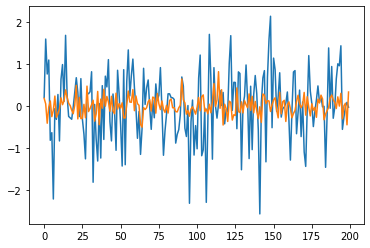

In [31]:
results.forecast(train_x[0], 1)
forecasted = np.array([list(results.forecast(train_x[i], 1)[0]) for i in range(0,train_x.shape[0])])
print(forecasted[-1])

print(df_total.values.shape)
print(forecasted.shape)

# while using one ts
#y_pred = forecasted[:,1:]
y_pred = forecasted[:,2:]
y_train = df_total.madrid_change.values[lag_order:]

M = np.column_stack((y_train, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_pred))


print(M)
plt.plot(M[-200:])